In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

First we create a dataset for the lecture.

In [5]:
X, y = datasets.make_blobs(
                           n_samples=1000,
                           n_features=2,
                           centers=4,
                           random_state=42,
                           cluster_std=1.4
                           )

In [6]:
X.shape

(1000, 2)

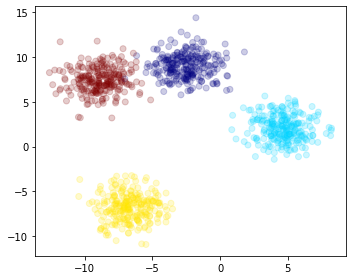

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], c=y, alpha=.2, cmap='jet')
plt.tight_layout()

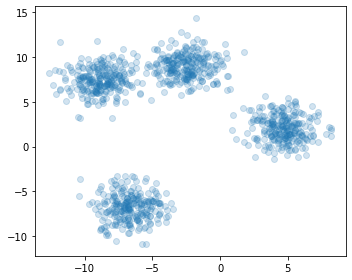

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], alpha=.2, cmap='jet')
plt.tight_layout()

This is  what the algorith "sees" and tries to sepaatethe clusters.

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(X)
model.labels_

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 1, 3, 3, 3, 0, 0, 2,
       2, 2, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 3, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       0, 2, 3, 0, 2, 0, 1, 3, 0, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 2, 0, 3,
       1, 1, 0, 3, 2, 3, 0, 1, 0, 2, 0, 3, 0, 3, 1, 3, 3, 3, 0, 2, 1, 1,
       3, 3, 3, 3, 0, 0, 2, 0, 2, 3, 0, 1, 0, 2, 2, 2, 2, 0, 0, 3, 1, 3,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 3, 1, 2, 0, 2, 1, 0, 2, 1, 0, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 0, 3, 3, 2, 2, 2, 0, 0, 3, 3, 3, 3, 2, 1, 1,
       3, 0, 3, 0, 0, 2, 1, 3, 0, 1, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 3, 2,
       1, 2, 1, 2, 0, 0, 3, 1, 3, 1, 0, 2, 3, 1, 0, 3, 0, 0, 3, 2, 1, 1,
       1, 2, 3, 1, 0, 3, 0, 0, 1, 3, 0, 1, 1, 2, 1, 1, 0, 3, 1, 3, 2, 0,
       2, 2, 1, 3, 2, 3, 0, 1, 1, 3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 3, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 3, 2, 0, 3, 0, 1, 3, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 3,
       3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,

In [11]:
model.cluster_centers_

array([[ 4.66469562,  2.04847655],
       [-6.69175808, -6.78688075],
       [-8.84996723,  7.46068495],
       [-2.47178361,  9.03884335]])

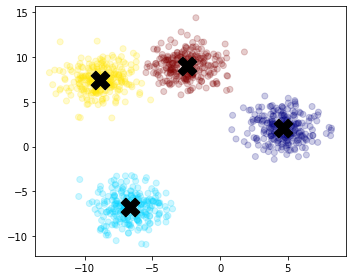

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], c=model.labels_, alpha=.2, cmap='jet')
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=350, c='k', marker='X')
plt.tight_layout()

### How does work KMeans?

First the algorithm selects centroids randomly. Then it calculates the closest points to each centroid.

In order to predict the correct points KMeans uses iteration.

It moves the centroids to the mean of each centroid points and starts again iterating until centroid position no longer changes.

In [14]:
# RESERVADO PARA LA VISUALIZACION PREPARADA POR EL PROFESOR